In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=7
CHANNEL=3
# kasari tha pauni bhanda image ko properties ma gayera herni

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("hello",
                                                            shuffle=True,
                                                            image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                            batch_size=BATCH_SIZE
                                                           )

Found 14 files belonging to 2 classes.


In [4]:
class_names=dataset.class_names
class_names

['lalit', 'shirish']

In [5]:
len(dataset)

2

In [6]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[1])

tf.Tensor(
[[[114.       169.       225.      ]
  [114.       169.       225.      ]
  [114.       169.       225.      ]
  ...
  [114.453125 167.45312  220.35938 ]
  [114.453125 167.45312  220.35938 ]
  [114.453125 167.45312  220.35938 ]]

 [[114.       169.       225.      ]
  [114.       169.       225.      ]
  [114.       169.       225.      ]
  ...
  [115.       168.       222.      ]
  [115.       168.       222.      ]
  [115.       168.       222.      ]]

 [[114.       169.       225.      ]
  [114.       169.       225.      ]
  [114.       169.       225.      ]
  ...
  [115.       168.       222.      ]
  [115.       168.       222.      ]
  [115.       168.       222.      ]]

 ...

 [[107.93982   96.28906   90.30786 ]
  [ 90.732666  86.28125   85.405396]
  [ 79.99597   78.69934   81.99597 ]
  ...
  [ 72.        73.        77.      ]
  [ 71.        72.82031   76.      ]
  [ 71.        72.        76.      ]]

 [[120.84827  102.10156   91.652954]
  [ 98.8844    90.40991   

In [7]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    #euta batch ma vayeko shape ra numpy
    #tesnor is converted into tensor

(7, 256, 256, 3)
[1 0 0 1 1 1 0]


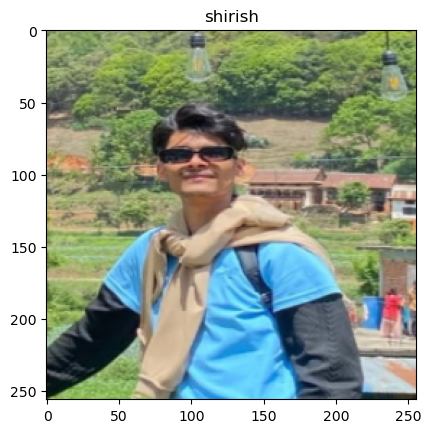

In [8]:
#printng one image
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[1].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])

In [9]:
len(dataset)

2

80% training
10% validation
10% test

In [10]:
train_size=0.8
len(dataset)*train_size

1.6

In [11]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [12]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [205]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [206]:
from tensorflow.keras import layers

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

# data_augmentation = tf.keras.Sequential([
#     layers.RandomFlip("horizontal_and_vertical"),
#     layers.RandomRotation(0.2)
# ])
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])



In [207]:
from tensorflow.keras import layers, models

input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)
n_classes = 2  # Example: good vs bad tomato

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2), input_shape=input_shape),
    layers.MaxPooling2D((2, 2), padding='same'),

    #  layers.Conv2D(32, (3, 3), activation='relu', padding='same',  input_shape=input_shape),
    # layers.AveragePooling2D(pool_size=(2, 2), padding='same'),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),

    layers.Flatten(),
    layers.Dense(16, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

# Build and show model summary
model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, 3))
model.summary()


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_30 (Sequential)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_31 (Sequential)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_78 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_72 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_79 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_73 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_80 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_74 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_24 (Flatten)                 │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 16)                  │         131,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 150,514 (587.95 KB)

 Trainable params: 150,514 (587.95 KB)

 Non-trainable params: 0 (0.00 B)

In [208]:
# from tensorflow.keras import layers, models

# input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)
# n_classes = 2  # Example: good vs bad tomato

# model = models.Sequential([
#     resize_and_rescale,
#     data_augmentation,
    
#     layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
#     layers.MaxPooling2D((2, 2), padding='same'),

#     layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
#     layers.MaxPooling2D((2, 2), padding='same'),

#     layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
#     layers.MaxPooling2D((2, 2), padding='same'),

#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(n_classes, activation='softmax')
# ])

# # ✅ Proper way to build
# model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, 3))

# # Print model summary
# model.summary()


In [209]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [210]:
history=model.fit(
    train_ds,
    epochs=5,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.5714 - loss: 0.6816
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.5714 - loss: 0.8556
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.5714 - loss: 0.6525
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.4286 - loss: 0.7076
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.4286 - loss: 0.7032


In [211]:
scores=model.evaluate(test_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.5714 - loss: 0.6741


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


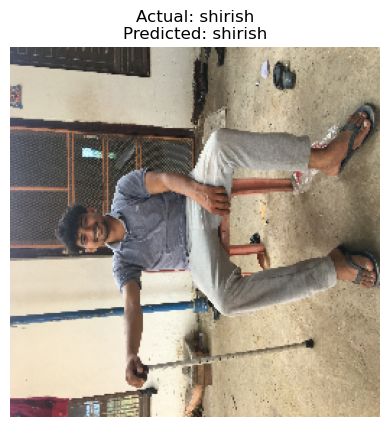

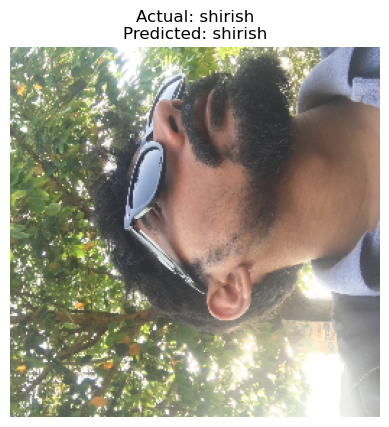

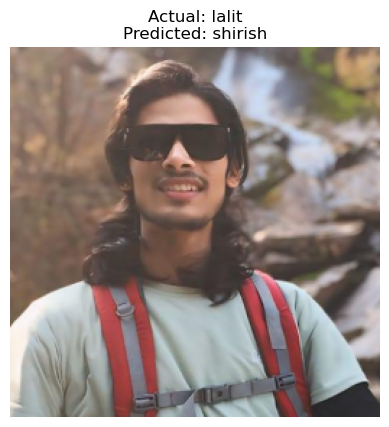

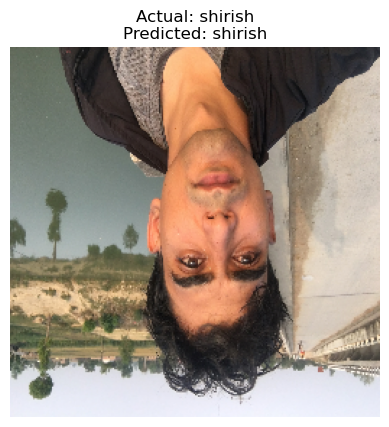

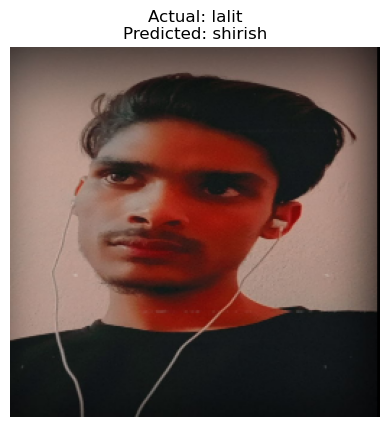

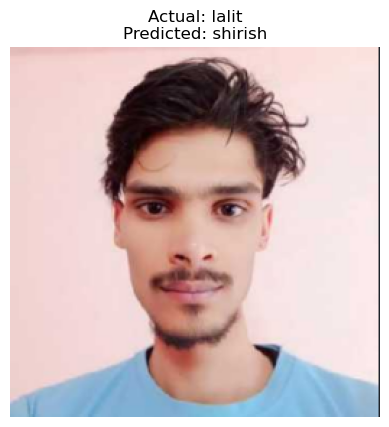

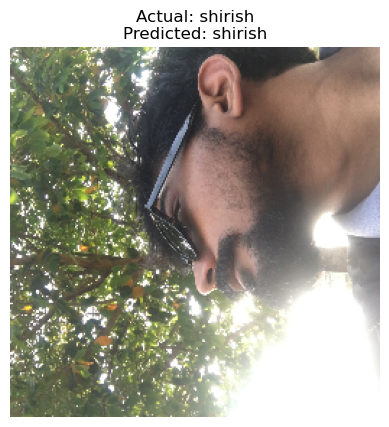

In [212]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Optional: Ensure eager execution is enabled (typically already is in TF 2.x)
tf.config.run_functions_eagerly(True)

# Loop through all batches in the test dataset
for images_batch, labels_batch in test_ds:
    # Convert batch to NumPy arrays
    images_np = images_batch.numpy().astype('uint8')
    labels_np = labels_batch.numpy()

    # Predict the batch
    batch_prediction = model.predict(images_batch)

    # Loop through each image in the batch
    for i in range(len(images_np)):
        image = images_np[i]
        label = labels_np[i]

        # Get predicted label
        predicted_index = np.argmax(batch_prediction[i])
        predicted_class = class_names[predicted_index]

        # Show the image with actual & predicted label
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"Actual: {class_names[label]}\nPredicted: {predicted_class}")
        plt.show()


In [213]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)

    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} slice index 7 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

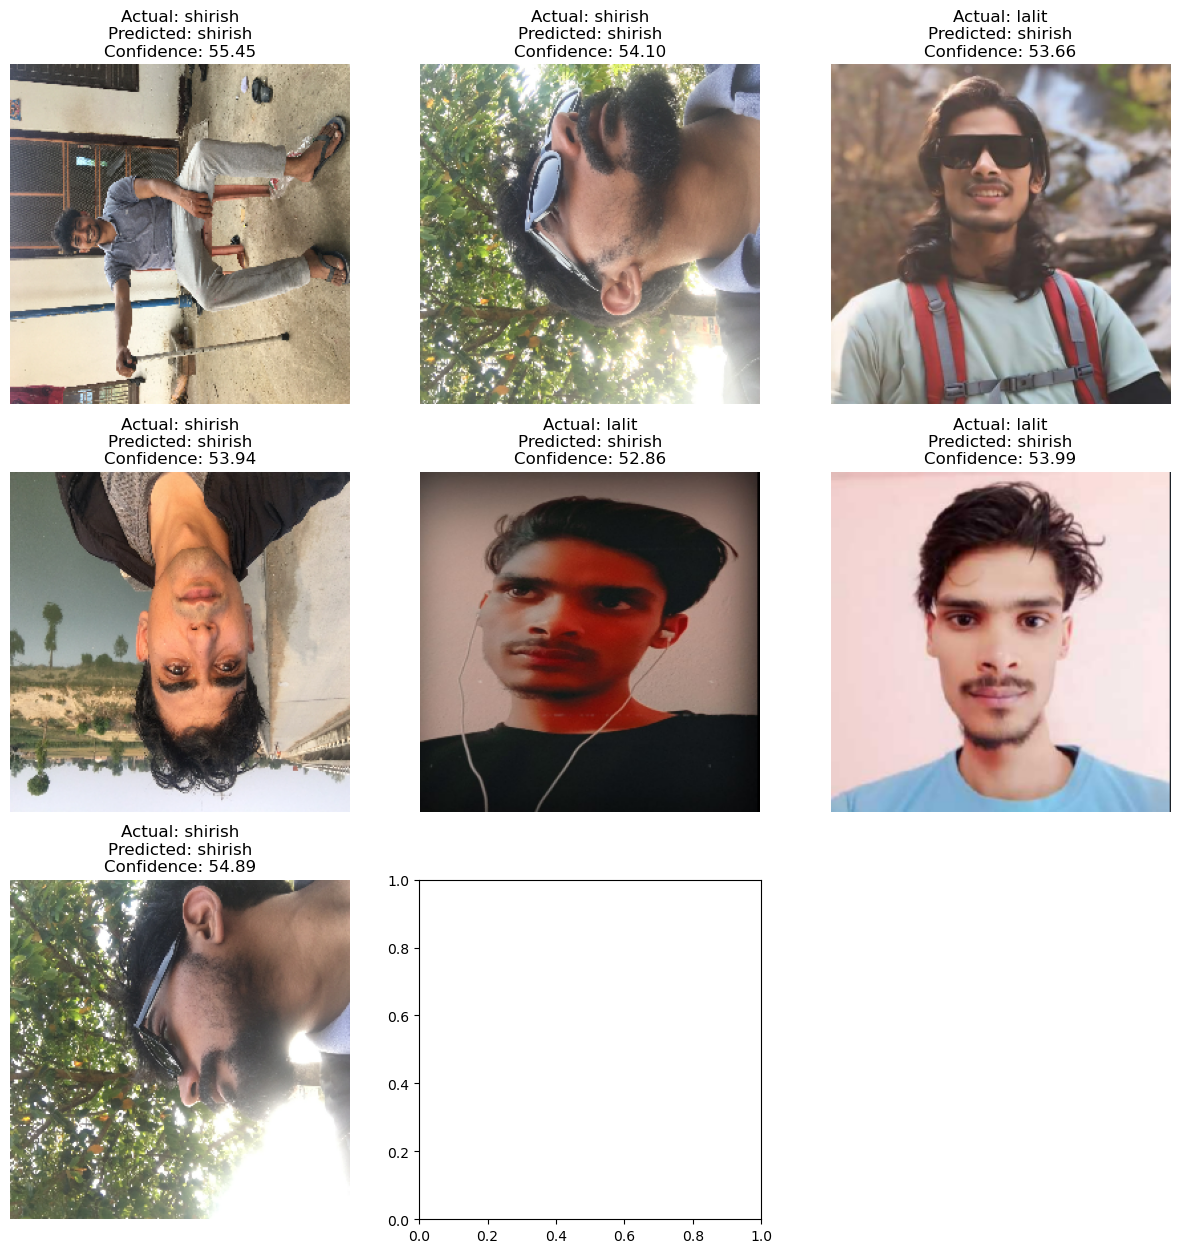

In [214]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(
            f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}"
        )
        plt.axis("off")


In [ ]:
score = model.evaluate(test_ds, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


In [216]:
from sklearn.metrics import classification_report
import numpy as np

y_true = []
y_pred = []

# Collect predictions and true labels from test dataset
for images, labels in test_ds:
    for i in range(len(images)):
        image = images[i].numpy()
        label = labels[i].numpy()
        
        predicted_class, _ = predict(model, image)
        
        # Convert predicted class name to index
        y_pred.append(class_names.index(predicted_class))
        y_true.append(label)

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
              precision    recall  f1-score   support

       lalit       0.00      0.00      0.00         3
     shirish       0.57      1.00      0.73         4

    accuracy                           0.57         7
   macro avg       0.29      0.50      0.36         7
weighted avg       0.33      0.57      0.42         7



C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
